In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('ml-100k/u.data',sep="\t",header=None,
                names=['userId','itemId','rating','timestamp'])   #without header one we get the first line as header and without name we get 

In [3]:
data.head()

,userId,itemId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movieInfo=pd.read_csv("ml-100k/u.item",sep="|",header=None,
                     names=['itemId','title'],
                           usecols=[0,1])     #we only need to read two columns that is item id and title which are 0 and 1

In [5]:
movieInfo.head()

,itemId,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
data=pd.merge(data,movieInfo,on='itemId')    #    using item id we combine both the data frames Data And MovieInfo

In [7]:
data.head()

,userId,itemId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [8]:
toyStoryUsers=data[data.title=="Toy Story (1995)"]     #subset with only the users rated toy story

In [9]:
toyStoryUsers.shape

(452, 5)

In [10]:
data[data.title.str.contains('Toy',case=False)].head()    #we can give patterns like starting with Toy be like ^Toy    ##alternative

,userId,itemId,rating,timestamp,title
3397,308,1,4,887736532,Toy Story (1995)
3398,287,1,5,875334088,Toy Story (1995)
3399,148,1,4,877019411,Toy Story (1995)
3400,280,1,4,891700426,Toy Story (1995)
3401,66,1,3,883601324,Toy Story (1995)


# writing function to find top N fav movies of a user

In [11]:
data[data.userId==5].sort_values('rating',ascending=False)[:3].title

26006    Empire Strikes Back, The (1980)
33608                Blade Runner (1982)
41294         Wrong Trousers, The (1993)
Name: title, dtype: object

In [12]:
def favoriteMovies(UserId,N):
    topMovies=pd.DataFrame.sort_values(
        data[data.userId==UserId],['rating'],
    ascending=False)[:N]
    return list(topMovies.title)

print(favoriteMovies(5,3))    #print the top 3 movies of user with Id 5

['Empire Strikes Back, The (1980)', 'Blade Runner (1982)', 'Wrong Trousers, The (1993)']


# A Basic Movie Recommendation

# Find avg rating for the movies

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data.groupby('title')['rating'].mean().head()   #grouping done on basis of title and then avg rating calculated


title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [15]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()  #grouping on basis of title and highest rating movies calculated


title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [16]:
data[data.title=='Star Wars (1977)'].rating.mean()

4.3584905660377355

In [17]:
data[data.title=='Star Wars (1977)'].rating.count()   #no of users who gave rating to star wars

583

In [18]:
# which title has most ratings
data.groupby('title')['rating'].count().sort_values(ascending=False).head()    # no of users in descending order

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [19]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())


In [20]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
# Now set the number of rating columns

In [22]:
ratings['num of user ratings']=pd.DataFrame(data.groupby('title')['rating'].count())   #added a new column by the name of number of users

In [23]:
ratings.head()

,rating,num of user ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


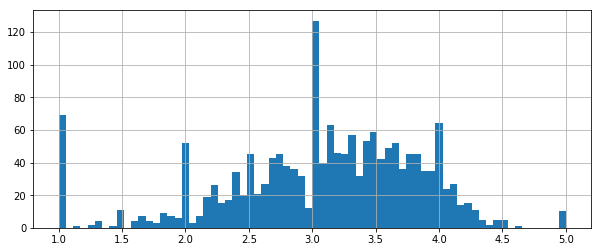

In [24]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)     #bins for the no of bars

In [27]:
moviemat=data.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [29]:
moviemat.iloc[:,0].head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: 'Til There Was You (1997), dtype: float64

# Most Rated Movie:

In [32]:
ratings.sort_values('num of user ratings',ascending=False).head(10)

,rating,num of user ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


# Pick two movies and find their user ratings

## Lets choose two movies starwars,a sci-fi movie. and Lier Lier,a comedy.

In [33]:
starwars_user_ratings=moviemat['Star Wars (1977)']
starwars_user_ratings.head()

userId
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [34]:
liarliar_user_ratings=moviemat['Liar Liar (1997)']
liarliar_user_ratings.head()

userId
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
Name: Liar Liar (1997), dtype: float64

# Compute pairwise correlation between row and column of the two dataframe objects.

# We can then use corrwith() method to get correlation between two pandas series:

In [37]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)      # to check the movies similar to starwars correlation will be high for that movie

In [ ]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corrstarwars.dropna(inplace=True)
corr_